# resumen 
1. creando arreglos 
  - np.array(lista)
  1.0 ver info del array
    - a = np.array([[0,1,2], [3,4,5]])   
      print(type(a), a.shape, a.ndim, len(a), a.dtype) # <class 'numpy.ndarray'>, (2, 3), 2 (dos dimenciones (2,3), 6, int32

  1.1 funciones para crear arreglos
    - + np.empty((3,2)) # creara un aray vacio listo para ser rellenado, usado en: 1 emotion AI
    - np.arange(0,10,2) # inicio, final (excluido), paso
    - np.linspace(0 , 5, 11) # creara 11 numeros enre 0 -5 
    1.1.2 arreglos comunes: 
      - np.ones((3,3))
      - np.full((2,2),3)
      - np.zeros((2,2))
      - np.eye(3)
      - np.diag(np.array([1,2,3,4]))
      - a = np.ones_like(a1) # crea un array de ones del tamaño a1
  1.2 crar arreglos aletorios 
    - np.random.rand(4) # uniformes in [0, 1]
    - a = np.random.randn(4) # Gaussianos
    - np.random.seed(12) # puedes crear una semilla
    - np.random.rand(4)
  1.3 añadir y eliminar:
    - np.insert(a, obj= indice, array_a_insertar)
    - np.append(a, array_a_insertar)
    - np.delete(a, obj= indice )
    - np.trim_zeros(a) # elimirara los 0 del array 
    - np.unique(a) # eliminara datos repetidos y creara un nuevo array

2. Cambia la forma de una matriz
  - entender la diferencia entre un array: serie (500,) vs (500,1) array columna 
  -  + como agregar a una imgen (90,90) dimension de bach size(1,90,90)  y dimension de canales RGB (90,90,1). se puede hacer con a.rehape() y np.expand_dimns(), ver capitulo.
  - + np.expand_dims(a, axis=0) = # [1, 2] (2,) > [[1, 2]] (1,2), muy usado cuando a queremos añadir la dimension del batchsize o de los pixeles RGB. tambien se puede usar reshape. usado en: 1 emotion AI
  - a.reshape(2,3) #  2*3=6, las dimenciones deben de dar a el numero de archivos 
  - a.resize(2,3) # lo mismo que reshape pero el anterior pero este crea una copia 
  - a.T # trasponer = cambiar columanas por filas (2,3)> (3,2)
  - a.flatten() # aplanar flatten = reshape(1), devuelve una copia 
  - a.ravel() # lo mismo que flatten pero este devuelve una vista
  - np.split(a,[indices de corte], indices_or_sections= numero de cortes )
  - np.vsplit(a,3) # divide el array en filas
  - np.hsplit(a,3) # divide en columnas
  - np.stack((a,b),axis=0) # stack hace lo contrario de split, apila vectore en eje=0 apilar. util para pasar los datos (90,90) de una columna de un dataframe de: (500,) > (500,90,90), ver el 1_my_emotion_ai
  - np.concatenate((a,b), axis=0) # parecido a stack
3. Tipos de datos básicos
  - print(a.dtype) # complejos, booleanos, cadenas,  int32/int64...
4. visualización básica:

  4.1 1D   
    - plt.plot(np.linspace(0,5,20), np.linspace(-1,7,20)) # gráfica con línea continua
    - plt.plot(x,y) # gráfica con línea punteada

  4.2 2D     
    - plt.imshow(np.random.rand(30,30), cmap=plt.cm.hot)

  4.3 3D     
    - plt.contourf(np.linspace(0,10,30), np.linspace(0,10,30), image)
5. Indexado y segmentado
  - print(a[0], a[2], a[6]) # a = np.arange(0,10)
  - print(a[2][2]) # a = np.diag(np.arange(3))
  - a[0][0] = 3 # cambiar el dato de una direccion especifica
  5.1 Segmentado de arreglos, usando slicing(no solo indicar un solo dato si no los datos de una dimension )
    - print(a[2:8:2]) # [inicio:final:paso]
    - print(a[:4]) # desde inicio : 4
    - print(a[3:]) # desde 3 hasta el final
    - print(a[::2]) # imprime desde inicio hasta final en pasos de 2
    - si el array es de mas dimenciones # a = np.arange(20).reshape(4,5)
    - print(a[1:, ...]) #a[condicion 1radimencion, condicion 2dfa dimencion], **... indica todo**
6. copia vs vista 
- vista   
```
a1 = np.array([1,2,3])
a2 = a1
a2[0] = 10
a1
#=> array([10,  2,  3])
```
- copy
```
a1 = np.array([1,2,3])
a2 = a1.copy()
a2[0] = 10
a1
#=> array([1, 2, 3])
```
7. Indexado fancy
  - en 2_my_healtcare_ai use un indexado fancy para cambiar a color rojo los pixeles de una imagen cuando el mismo pixel de la mascara == 255. al final tenemos una imagen del cerebro con una mancha color rojo en el area donde la mascara == 255 (area del tumor )
```
imagen = io.imread(brain_df["image_path"][1000]) # shape (256,256)
mascara = io.imread(brain_df["mask_path"][1000]) # shape (256,256)
imagen[mascara == 255] = (0,0,255) 
```
  - en vez de crear una mascara booleana podemos sustituir un valor cuando se cumpla una condicion. el array y la mascara tiene que tener el mismo shape. es lo que hicimos arriba. 
  - booleano 
```
a = np.random.randint(0,20,15) # creamos un array de len 15
filtro = (a % 3 == 0) # cremaos un arrray con true cuando el residuo de un dato de a sea == 0
print(a[filtro]) # creara un array comparando indices, sacando los datos de a cuando el dato corresponiente de filtro sea true 
```
  - entero 
```
a = np.arange(5,15)
b = [1,2,3,4,5,6] # los indices deben estar en una lista de Python
print(a[b])  # [ 6  7  8  9 10 11]
a= np.arange(12).reshape(3,4)
x = [1]
y = [0,2]
print(a[x,y]) # [4 6]

```
8. operaciones estadisticas 
- a = np.array([[5, 10, 15], 
              [20, 25, 30], 
              [35, 40, 45]])
- la opercaion se hace en todos los valores del array    
  print(a.sum(),a.min(), a.max(), a.mean()) # output: 245, 5, 45, 25

- la opercaion se hace en un solo eje del array    
  print(a.sum(axis=0)) # output: [60, 75, 90]

9. juicio matricial 
  [[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]
  - mascara aplicada a todos valores del array     
  mascara = (a == 10)    
  #[[False False False], [False False False], [False False False], [False  True False]]   
  print(a[mascara]) # =[10]   
  - mascara aplicada a una dimension especifica    
  second_masc = (a[:,2] == 5)   
  print(a[second_masc,:]) # = [[3 4 5]]    
  - mascara con condiciones &(and) |(or)    
  masc2 = (a == 1) | (a == 3)     
  a[masc2] = 100    
  print(a) # = [[ 0  100  2], [ 100  4  5], [ 6  7  8], [ 9 10 11]]    


el 80 % se saco de aqui : https://claudiovz.github.io/scipy-lecture-notes-ES/intro/numpy/array_object.html#visualizacion-basica
  
el resto es de aqui: https://ichi.pro/es/libro-de-cocina-de-numpy-array-generacion-y-manipulacion-de-matrices-en-python-36927115397897


# Creando arreglos

In [ ]:

import numpy as np
a = np.array([0,1,2,3,4,5])
b = np.array([[0,1,2],[3,4,5]]) # array 2d 
c = np.array([[[0,1],[2,3]],[[4,5],[6,7]]])
def info_a(a):
  print(type(a))
  print(a)
  print(a.shape)
  print(a.ndim)
  print(len(a))
info_a(a)
#info_a(b)
#info_a(c)

<class 'numpy.ndarray'>
[0 1 2 3 4 5]
(6,)
1
6


## Funciones para crear arreglos
En la práctica, rara vez introducimos los items uno por uno

In [ ]:
# crear array vacio listo para rellenar 
a = np.empty((3,2))
print(a)
nu = 0
for n, m in zip(range(0,3), range(3,6)):
  a[nu] = [n, m]
  nu += 1
print(a)
print("-"*50)

# Uniformemente espaciados
a = np.arange(10)
print(a)
b = np.arange(0,10,2) # inicio, final (excluido), paso
print(b)

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]


In [ ]:
# o por número de puntos
a = np.linspace(0 , 5, 11) # inicio, final, número de puntos
print(a)
b = np.linspace(0 , 5, 11, endpoint=False) 
print(b)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.         0.45454545 0.90909091 1.36363636 1.81818182 2.27272727
 2.72727273 3.18181818 3.63636364 4.09090909 4.54545455]


In [ ]:
# Arreglos comunes

# matriz de unos
a =  np.ones((3,3))
print(a)
#un euqivalente pero para cualquier valor 
print(np.full((2,2),3))
print(np.full((3,2), ["a", "b"]))

# matriz de 1
print("-"* 50)
a =  np.zeros((2,2))
print(a)

# diagonal de 1 
print("-"* 50)
a =  np.eye(3)
print(a)

# diagonal de numeros
print("-"* 50)
a =  np.diag(np.array([1,2,3,4]))
print(a)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[3 3]
 [3 3]]
[['a' 'b']
 ['a' 'b']
 ['a' 'b']]
--------------------------------------------------
[[0. 0.]
 [0. 0.]]
--------------------------------------------------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
--------------------------------------------------
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [ ]:
# Generan una matriz con la misma forma que la matriz pasada pero con sus propios valores.
a1 = np.array([[1,2],[3,4]])
print(a1)
a = np.ones_like(a1) # crea un array de ones del tamaño a1
print(a)

[[1 2]
 [3 4]]
[[1 1]
 [1 1]]


In [ ]:
# np.random: números seudoaleatorios
a = np.random.rand(4) # uniformes in [0, 1]
print(a)


print("-"* 50)
a = np.random.randn(4) # Gaussianos
print(a)

print("-"* 50)
a = np.random.seed(12) 
"""
Establece la semilla aleatoria, esto se coloca antes de una condicion random 
ver ejeplo en ejemplo de enmascarado booleano
"""
print(a)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
--------------------------------------------------
[-0.52817175 -1.07296862  0.86540763 -2.3015387 ]
--------------------------------------------------
None


## Ejercicio: Creación de arreglos

Crear los siguientes arreglos (con los tipos de datos correctos)



```
[[1, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 6, 1, 1]]

[[0., 0., 0., 0., 0.],
 [2., 0., 0., 0., 0.],
 [0., 3., 0., 0., 0.],
 [0., 0., 4., 0., 0.],
 [0., 0., 0., 5., 0.],
 [0., 0., 0., 0., 6.]]
 ```


Para el curso: 3 casos de cada uno

Sugerencia: A los elementos de un arreglo se acceden de igual forma que una lista, por ejemplo a[1] or a[1, 2].

Sugerencia: Examine el docstring para diag.

Ejercicio: Crear arreglos en mosaicos

Repasa la documentación de np.tile, y utiliza esta función para construir la matriz


```
[[4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1],
 [4, 3, 4, 3, 4, 3],
 [2, 1, 2, 1, 2, 1]]
 ```





In [ ]:
# ejercicio
a =  np.diag(np.array([1,2,3,4,5,6]))
print(a.shape)
b = np.zeros(5)
print(b.shape)
a[0] = b
#c = np.stack((a[...], b), axis=0)


print(a)

(6, 6)
(5,)


ValueError: ignored

# Cambia la forma de una matriz
Esto es increíblemente útil y no puedo crear imágenes usando una biblioteca como Keras sin él. Veamos un ejemplo de creación y remodelación de una matriz.

1. reshape(vista) vs resize(copy)
2. trasponer:  ¿Podemos ser útiles para intercambiar filas y columnas antes de generar un marco de datos de pandas o hacer cálculos agregados como recuento o suma
3. aplanar: Aplana una matriz en 1 dimensión y devuelve una copia. Esto logra el mismo resultado que a reshape(6). Pero flattenpuede ser útil cuando no conoce el tamaño de una matriz de antemano.

In [ ]:
# debes de entender la difrencia entre estos 2 tipos de arrays
print(np.array([1,2]), "shape: ", np.array([1,2]).shape)
print("-"*30)
print(np.array([[1],[2]]), "shape: ", np.array([[1],[2]]).shape)
print("-"*30)

"""esto es importante saberlo ya que en el notebook "4 creando una NN desde 0 para clasificar.ipynb"
pasamos una serie (500,) a una matriz columna (500, 1)
y = y.reshape(500,1)""" 

## como agregar bach size y dimension de canales RGB


In [ ]:
a = np.empty((96,96))
print(a.shape)
# agregar dimension de lote

# opcion 1
a = a.reshape((1,) + a.shape)
print(a.shape)

a = np.empty((96,96))

# opcion 2
a = np.expand_dims(a, axis=0)
print(a.shape)

# agregar dimension de canales RGB
a = np.empty((96,96))
print("-"*50)

# opcion 1
a = a.reshape(a.shape + (1,)) # solo se puede hacer suma de tupla + tupla por eso indicamos la coma 
print(a.shape)                # y asi se concatenen las tuplas: a.shape + (1,2) = (96,96,1,2)

a = np.empty((96,96))

# opcion 2
a = np.expand_dims(a, axis=2)
print(a.shape)


In [ ]:
a = np.arange([1, 2])
print(a , "shape: ", a.shape)
np.expand_dims(a, axis=0)
print(a , "shape: ", a.shape)

print(50*"-")
a = np.arange(1, 7)
print("matriz incial: ", a, " tamaño: ", len(a))
print(a.reshape(2,3))
# ten en cuenta que la multiplicacion del reshape debe ser igual a los datos del array. 2*3=6
print(50*"-")
print(a.reshape(3,2))
print(50*"-")
print(a.reshape(6))
print(50*"-")
print(a.reshape(6,1)) # nota la diferencia con el de atras


matriz incial:  [1 2 3 4 5 6]  tamaño:  6
[[1 2 3]
 [4 5 6]]
--------------------------------------------------
[[1 2]
 [3 4]
 [5 6]]
--------------------------------------------------
[1 2 3 4 5 6]
--------------------------------------------------
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [ ]:
# resize es Similar a reshapepero muta la matriz original. es lo que veremos en copy vs vista

#con reshape
a = np.arange(1, 7)
print(a)
print(a.reshape(2,3))
print(a)
print(50*"-")

# con resize 
a = np.arange(1, 7)
print(a)
print(a.resize(2,3))
print(a)

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]
--------------------------------------------------
[1 2 3 4 5 6]
None
[[1 2 3]
 [4 5 6]]


In [ ]:

# trasponer = cambiar columanas por filas 
a = np.array([['s','t','u'],['x','y','z']])
print(a)
print(50*"-")
print(a.T)

print(100*"-")
a = np.arange(12).reshape(2,2,3)
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[['s' 't' 'u']
 ['x' 'y' 'z']]
--------------------------------------------------
[['s' 'x']
 ['t' 'y']
 ['u' 'z']]
----------------------------------------------------------------------------------------------------
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
(2, 2, 3)
[[[ 0  6]
  [ 3  9]]

 [[ 1  7]
  [ 4 10]]

 [[ 2  8]
  [ 5 11]]]
(3, 2, 2)


In [ ]:
# aplanar flatten = reshape(1), devuelve una copia  
a = np.arange(4).reshape(2,2)
print(a)
print(a.flatten())
#Similar a, flattenpero devuelve una vista de una matriz en lugar de una copia. 
print(a.ravel())

[[0 1]
 [2 3]]
[0 1 2 3]
[0 1 2 3]


In [ ]:
# vsplit(divide en filas), hsplit(divide en columnas ) divide la matriz en filas o columnas 
a = np.arange(9).reshape(3,3)
print(a)
print(np.vsplit(a,3)) # divide en filas
print(np.hsplit(a,3)) # divide en columnas 

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]
[array([[0],
       [3],
       [6]]), array([[1],
       [4],
       [7]]), array([[2],
       [5],
       [8]])]


In [ ]:
from matplotlib.cbook import flatten
from os import access
# stack hace lo contrario de split, esta funcion une o apila vectores
a,b = np.vsplit(np.arange(6).reshape(2,3), 2)
a = a.flatten()
b = b.flatten()
print(a)
print("-"*20)
print(b)
print("-"*30)

print(np.stack((a,b),axis=0))
print("-"*20)
print(np.stack((a,b),axis=1))

[0 1 2]
--------------------
[3 4 5]
------------------------------
[[0 1 2]
 [3 4 5]]
--------------------
[[0 3]
 [1 4]
 [2 5]]


 # Tipos de datos básicos
 Usted puede haber notado que, en algunos casos, los elementos del arreglo se muestran con un punto (por ejemplo, 2. vs 2). Esto se debe a los tipos de datos utilizados.


  Diferentes tipos de datos no permiten almacenar datos de forma más compacta en memoria, la mayoría de las veces simplemente trabaje con números de punto flotante. Tenga en cuenta que, en el ejemplo anterior, NumPy detecta automáticamente el tipo de datos a partir de la entrada.

In [ ]:
a = np.array([0,1,2,3])
print(a.dtype)
a = np.array([0.,1.,2.,3.])
print(a.dtype)
print("-" * 50)
#Puede especificar explícitamente qué tipo de datos desea
a = np.array([0,1,2,3], dtype=float)
print(a.dtype)

# El tipo de dato por defecto es de punto flotante
a =  np.zeros((2,2))
print(a.dtype)

# tambien hay: 
d = np.array([1+2j, 3+4j, 5+6*1j]) # complejos 
e = np.array([True, False, False, True]) # booleanos 
f = np.array(['Bonjour', 'Hello', 'Hallo',]) # cadenas 


# y muchos mas int32/int64..



int64
float64
--------------------------------------------------
float64
float64


# visualización básica
Ahora que tenemos nuestros primeros arreglos de datos, vamos a visualizarlos.


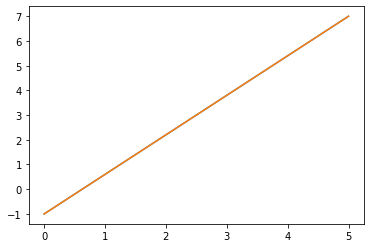

In [ ]:
# Arreglos 1D
import matplotlib.pyplot as plt
x = np.linspace(0,5,20)
y = np.linspace(-1,7,20)
plt.plot(x,y) # gráfica con línea continua
plt.plot(x,y) # gráfica con línea punteada
plt.show()

(30, 30)


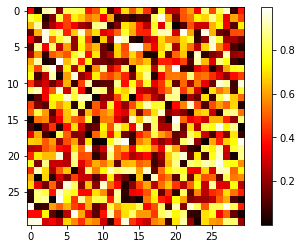

In [ ]:
# Arreglos 2D (como las imágenes)
image =  np.random.rand(30,30)

print(image.shape)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()
plt.show()


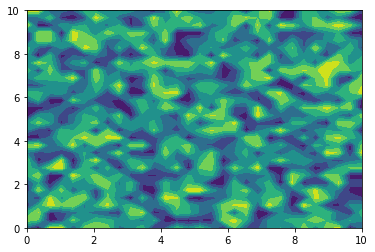

In [ ]:
#Trazado 3D
"""from mayavi import mlab
mlab.surf(image)
mlab.axes()"""
# sacado del video del decenso del gradiente 
plt.contourf(np.linspace(0,10,30), np.linspace(0,10,30), image)
plt.show()



# Indexado y segmentado
Los elementos de un arreglo se puede acceder y asignar de la misma forma que otras secuencias de Python (por ejemplo, listas)
![picture of arrays](https://claudiovz.github.io/scipy-lecture-notes-ES/_images/numpy_indexing.png)



In [ ]:
a = np.arange(0,10)
print(a)
print(a[0], a[2], a[6])




 

[0 1 2 3 4 5 6 7 8 9]
0 2 6


In [ ]:
# En arreglos multidimensionales, los índices son tuplas de números enteros
a = np.diag(np.arange(3))
print(a)

print("-"*50)
print(a[2][2])
#si queremos sacar toda una columan 
print("-"*50)
print(a[0]) #En 2D, la primera dimensión corresponde a las filas, la segunda a las columnas.

# si queremos cambiar el valor de una direccio es asi 
print("-"*50)
a[0][0] = 3
print(a)

[[0 0 0]
 [0 1 0]
 [0 0 2]]
--------------------------------------------------
2
--------------------------------------------------
[0 0 0]
--------------------------------------------------
[[3 0 0]
 [0 1 0]
 [0 0 2]]


In [ ]:
# Segmentado de arreglos, al igual que otras secuencias de Python también pueden ser segmentadas
a = np.arange(10)
print(a)
print(a[2:8:2]) # [inicio:final:paso].  a = np.arange(10)

print("-"*50)
print(a[:4]) # desde inicio : 4
print(a[3:])

print("-"*50)
print(a[1:3])
print(a[::2])


[0 1 2 3 4 5 6 7 8 9]
[2 4 6]
--------------------------------------------------
[0 1 2 3]
[3 4 5 6 7 8 9]
--------------------------------------------------
[1 2]
[0 2 4 6 8]


# Copias vs vistas
Una operación de segmentado crea una vista del arreglo original, que es sólo una forma de acceder a los datos de un arreglo. Por lo tanto el arreglo original no es copiado en memoria.
Al modificar una vista, la matriz original es modificado
Copiar
Haga una copia de una matriz existente.

La asignación de una matriz a un nuevo nombre de variable apuntará a la matriz original. Debe tener cuidado con este comportamiento para no modificar involuntariamente las variables existentes.

```
a1 = np.array([1,2,3])
a2 = a1
a2[0] = 10
a1
#=> array([10,  2,  3])
```
## la importancia de usar copy 



```
a1 = np.array([1,2,3])
a2 = a1.copy()
a2[0] = 10
a1
#=> array([1, 2, 3])
```

In [ ]:
# si no creamos copia a y b estaran unida y cualquier modificacion en b afectara a a 
a = np.arange(10)
print(a)
b = a[::2] 
b[0] = 12
print("valor de a: ", a) 
print("valor de b: ", b) 

# al crear  una copia a y b seran dos variables independientes
print("-"*50) 
a = np.arange(10)
print(a)
b = a[::2].copy() # creando una copia 
b[0] = 12
print("valor de a: ", a) 
print("valor de b: ", b)

[0 1 2 3 4 5 6 7 8 9]
valor de a:  [12  1  2  3  4  5  6  7  8  9]
valor de b:  [12  2  4  6  8]
--------------------------------------------------
[0 1 2 3 4 5 6 7 8 9]
valor de a:  [0 1 2 3 4 5 6 7 8 9]
valor de b:  [12  2  4  6  8]


### Ejemplo práctico: Criba de números primos

![texto del vínculo](https://claudiovz.github.io/scipy-lecture-notes-ES/_images/prime-sieve.png)
Calcular los números primos en 0–99, con una criba

Construir un arreglo booleano es_primo con 100 elementos, en el principio todos sus elementos son True



```
>>> es_primo = np.ones((100), dtype=bool)
Descartar 0 y 1 porque no son primos
>>>
>>> es_primo[:2] = 0 # 0 es False, 1 es True
Para cada número entero j a partir de 2, descartar sus múltiplos superiores
>>>
>>> numero_maximo = int(np.sqrt(len(es_primo)))
>>> for j in range(2, numero_maximo):
...     es_primo[2*j::j] = False
```

Repase help(np.nonzero), e imprima los números primos

Pasos a seguir:

Mueva el código anterior a un script llamado criba_primos.py
Ejecutar para comprobar que funciona
Convierta esta criba simple una Criba de Eratóstenes:
Descarte los j que ya son conocidos por no ser primos
El primer número para descartar es j^2

## Indexado fancy
 Los arreglos numpy pueden indexarse ​​en segmentos, pero también con arreglos booleanos o arreglos enteros (enmascarados). Este método se llama indexado fancy. Crea copias no vistas.
 ## Usando enmascarado booleano

 

 ## indexado con una arreglo de enteros

La imagen a continuación muestra varias aplicaciones del indexado fancy
 ![texto del vínculo](https://claudiovz.github.io/scipy-lecture-notes-ES/_images/numpy_fancy_indexing.png)

 


In [ ]:
# en 2_my_healtcare_ai use un indexado fancy para cambiar el a colo rojo un pixel de una imagen cuando el mismo pixel de la mascara == 255
imagen = io.imread(brain_df["image_path"][1000]) # shape (256,256)
mascara = io.imread(brain_df["mask_path"][1000]) # shape (256,256)
imagen[mascara == 255] = (0,0,255) 


In [ ]:
# Usando enmascarado booleano
np.random.seed(3)
a = np.random.randint(0,20,15)
print(a)
# creamos un array mascara booleano cuando el residuo de los valores de a al dividir entre 3 sea 0
filtro = (a % 3 == 0)
print(filtro)

extraer_desde_a = a[filtro]
print(extraer_desde_a)

# El indexado con máscara puede ser muy útil para asignar un nuevo valor a un subarreglo
print("-"*50) 
a[a % 3 == 0] = -1 # o tambien,  a[a%3==0] = -1
print(a)

[10  3  8  0 19 10 11  9 10  6  0 12  7 14 17]
[False  True False  True False False False  True False  True  True  True
 False False False]
[ 3  0  9  6  0 12]
--------------------------------------------------
[10 -1  8 -1 19 10 11 -1 10 -1 -1 -1  7 14 17]


In [ ]:
# Indexado con una arreglo de enteros

a = np.arange(5,15)
print(a)
print(a[[1,2,3,4,5,6]])  # los indices deben estar en una lista de Python
a[[9,7]] = -11  # Nuevos valores pueden ser asignados con este tipo de indexado
print(a)


print("."*60)
a= np.arange(12).reshape(3,4)
print(a)
x = [1]
y = [0,2]
print(a[x,y])

"""
 Cuando una nuevo arreglo es creado a partir de un indexado de un arreglo 
 de enteros, el nuevo arreglo tiene la misma forma que el arreglo de enteros
"""
a = np.arange(5,15)
print(a)
indices = np.array([[0,1],[5,6]])
# es lo mismo que aplanar el array indices [[0,1],[11,12]] > [0,1,11,12] pero la forma sera la del indice
print(a[indices])

[ 5  6  7  8  9 10 11 12 13 14]
[ 6  7  8  9 10 11]
[  5   6   7   8   9  10  11 -11  13 -11]
............................................................
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[4 6]
[ 5  6  7  8  9 10 11 12 13 14]
[[ 5  6]
 [10 11]]


In [ ]:
""" no entendi """
a = np.arange(12).reshape(3,4)
print(a)
i = np.array([[0, 1], [1, 2]])
print(a[i, 2]) # lo mismo es a[i, 2*np.ones((2, 2), dtype=int)]

# seria un equivalente a pero en el ejemplo de arriba el vector de salida toma la forma de i
print(a[[0,1,1,2] ,[2,2,2,2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 2  6]
 [ 6 10]]
[ 2  6  6 10]


# Operaciones estadísticas

In [ ]:
a = np.array([[5, 10, 15], 
              [20, 25, 30], 
              [35, 40, 45]])
# la opercaion se hace en todos los valores del array
print(a.sum())  
print(a.min()) 
print(a.max())
print(a.mean())

# la opercaion se hace en un solo eje del array
print("-"*50)
print(a.sum(axis=0)) # la operacion se hace en las columnas 
print(a.max(axis=1)) # en las filas 

225
5
45
25.0
--------------------------------------------------
[60 75 90]
[15 30 45]


# juicio matricial 
Use == para determinar si un valor existe en una matriz o matriz

In [ ]:
a = np.arange(0,12).reshape(4,3)
print(a)
mascara = (a == 10) # podemos crear una mascara booleana cuando un valor sea = 10
print(mascara) 
print(a[mascara]) # esa mascara la podemos usar para acceder a una ubicacion del array

print("-"*50)

# podemos crear una mascara para una columna 
second_masc = (a[:,2] == 5)
print(second_masc)
print(a[second_masc,:])

print("-"*50)

# podemos usar multiples condiciones a la vez
a = np.array([5,10,15,20])
masc1 = (a == 10) & (a == 15) # condicion "and", deben cumplirse las dos 
print(masc1)

masc2 = (a == 10) | (a == 15) # condicion "or" cualquiera de las dos condiciones son aceptables 
print(masc2)
a[masc2] = 100 # podemos cambiar por 100 en los inidcices de la mascara
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[False False False]
 [False False False]
 [False False False]
 [False  True False]]
[10]
--------------------------------------------------
[False  True False False]
[[3 4 5]]
--------------------------------------------------
[False False False False]
[False  True  True False]
[  5 100 100  20]


Búsqueda y Filtrado de Datos en Arrays de Numpy con Python
https://www.youtube.com/watch?v=U-7Q-koi-Cc



Manipulación de arrays en NumPy
https://www.youtube.com/watch?v=ociK-m_UyYU
